In [1079]:
# Import frameworks
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

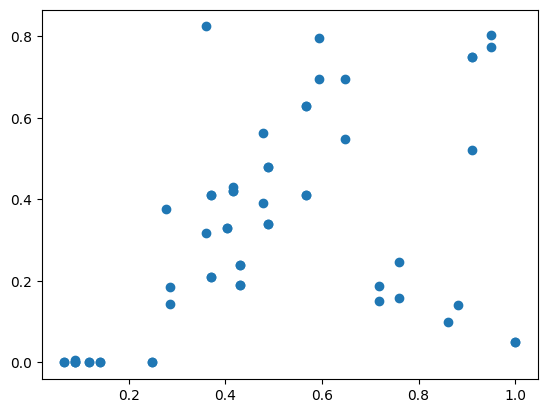

In [ ]:
# Create a data frame from the csv file
data = pd.read_csv('model_ready_data.csv')
plt.scatter(data['Risk%'], data['AHI'])

# Split the data into training and testing data
training_data, testing_data = train_test_split(data, test_size=0.4)

# Save the training and testing data to csv files
training_data.to_csv('training_data.csv', index=False)
testing_data.to_csv('testing_data.csv', index=False)

In [2]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

In [3]:
training_data = pd.read_csv('training_data.csv')

x_name = ['Risk%']
y_name = 'AHI'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

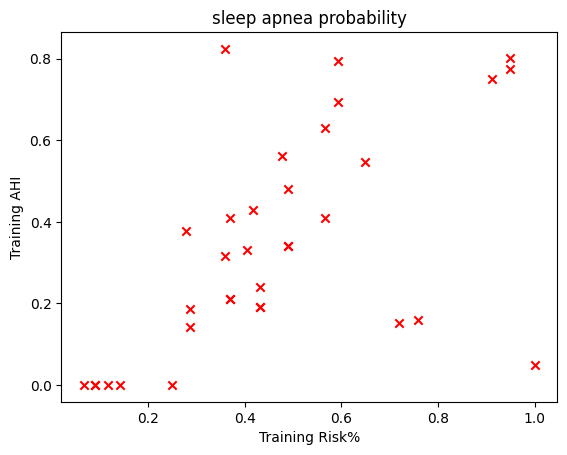

In [4]:
if(len(x_name) == 1):
    plt.scatter(x, y, marker='x', c='r')
    plt.title("sleep apnea probability")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3))
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("sleep apnea probability")
plt.show()

In [5]:
poly = PolynomialFeatures(degree=8, include_bias=False)
test_poly = PolynomialFeatures(degree=8, include_bias=False)
poly_features = poly.fit_transform(x)

# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(poly_features, y)

LinearRegression()

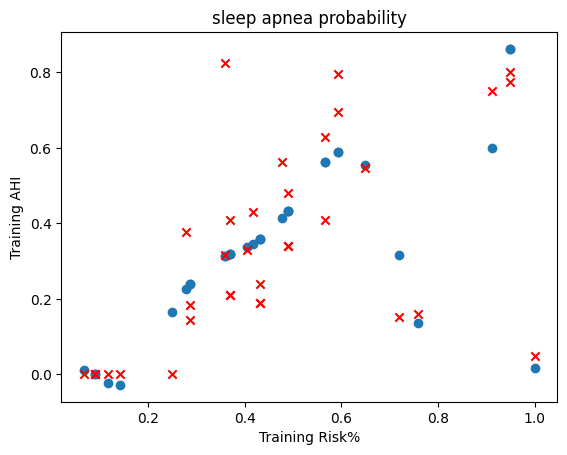

In [6]:
y_pred = my_model.predict(poly_features)
if(len(x_name) == 1):
    plt.scatter(x, y_pred)
    plt.scatter(x, y, marker='x', c='r')
    plt.title("sleep apnea probability")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
        ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("sleep apnea probability")
plt.show()

In [10]:
# save the model to disk
filename = 'apnea_model_poly.sav'
pickle.dump(my_model, open(filename, 'wb'))

In [8]:
x_col = 'Risk%'
testing_data = pd.read_csv('testing_data.csv')
x_test = test_poly.fit_transform(np.array(testing_data[x_col]).reshape(-1, 1))
y_test = np.array(testing_data['AHI'])

In [17]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Predictions
y_train_pred = my_model.predict(poly_features)
y_test_pred = my_model.predict(x_test)

# Metrics
train_mse = root_mean_squared_error(y, y_train_pred)
test_mse = root_mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_mse}, Testing RMSE: {test_mse}")
print(f"Training R2: {train_r2}, Testing R2: {test_r2}")

Training RMSE: 0.13497619276133707, Testing RMSE: 0.09509100400775701
Training R2: 0.7364953839817444, Testing R2: 0.8381077624774975


In [15]:
data = pd.read_csv('model_ready_data.csv')
predict = np.array(data[x_name]).reshape(-1, 1)
result = my_model.predict(predict)
print(result[0])

ValueError: X has 1 features, but LinearRegression is expecting 8 features as input.